In [1]:
#install word-cloud package
%pip install wordcloud

In [2]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download (['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#Load dataset
Rating = pd.read_csv('tourist_accommodation_reviews_main.csv')
Rating.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [4]:
Rating.shape

(53644, 5)

In [5]:
#Rename column
Rating.rename(columns = {'Hotel/Restaurant name':'Restaurant'}, inplace = True)

In [6]:
#Extract details of the first set data
Rating.head()

,ID,Review Date,Location,Restaurant,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [7]:
#Extract the 15 seafood restaurant details to be used for this analysis
seafoodcuisine = Rating[Rating.Restaurant.isin(["Horn Grill Steak and Seafood","Patong Seafood","Red Duck Restaurant","Tiger Inn Restaurant","Kwong Shop Seafood","Linda Seafood","Laem Hin Seafood","Salaloy Seafood","Mai Khao Seafood Local Restaurant","Kusuma Seafood","99 Seafood",
"Up Seafood","Mr Good's Seafood","Savoy Patong","Karon Seafood"])]

In [8]:
#check for missing values
seafoodcuisine["Review"].isna().sum()

0

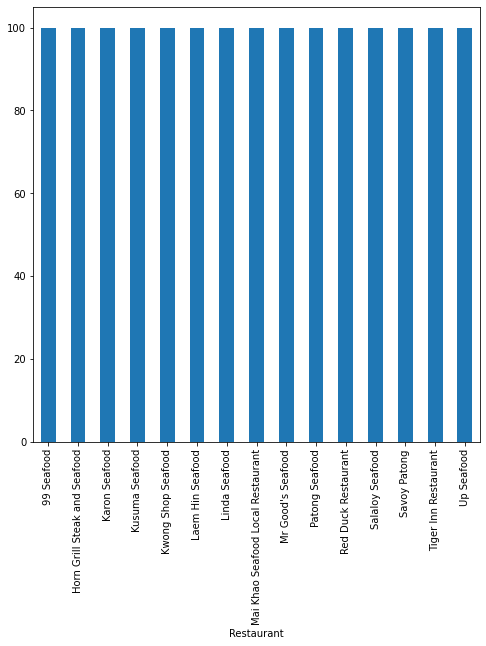

In [9]:
#check for class imbalance
plt.figure(figsize = (8,8))
seafoodcuisine.groupby('Restaurant').Review.count().plot.bar(ylim=0)
plt.show()

In [10]:
#Extract the 15 steak&grill restaurant details to be used for this analysis
steakandgrill = Rating[Rating.Restaurant.isin(["Sam's Steaks and Grill","Karlsson Restaurant & Steak House","Churrasco Phuket Steakhouse","Plum Prime Steakhouse","Karon Cafe Steakhouse & Thai Cuisine","Harrys Steakhouse & Hotel","Mando Restaurant & Steakhouse", "Bondi Aussie Bar & Grill Phuket","Buffalo Steak House - Karon Beach","El Gaucho Steakhouse","EAT. bar & grill","Cut Grill & Lounge",
"Andaman Grill","Three Crowns Restaurant & Grill","The Blue Mango Bar and Grill"])]

In [11]:
#check for missing values
steakandgrill["Review"].isna().sum()

0

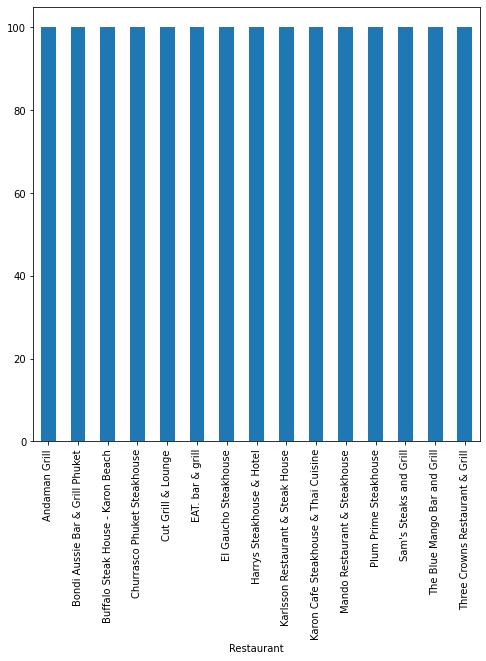

In [12]:
#check for class imbalance
plt.figure(figsize = (8,8))
steakandgrill.groupby('Restaurant').Review.count().plot.bar(ylim=0)
plt.show()

In [13]:
#perform descriptive statistical analysis
seafoodcuisine.describe()

,ID,Review Date,Location,Restaurant,Review
count,1500,1500,1500,1500,1500
unique,1500,856,9,15,1500
top,rn580840569,Reviewed 1 week ago,Patong,Red Duck Restaurant,We returned to Red duck after being away for a...
freq,1,9,400,100,1


In [14]:
#perform descriptive statistical analysis
steakandgrill.describe()

,ID,Review Date,Location,Restaurant,Review
count,1500,1500,1500,1500,1500
unique,1490,721,7,15,1490
top,rn578942552,Reviewed 3 weeks ago,Patong,EAT. bar & grill,Visited here for lunch before we took the boat...
freq,2,24,500,100,2


In [15]:
#Removing stop words from tokenized text
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
 #define a function to apply data pre-processing steps
def preprocess_text(text):
  tokenized_doc = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #tokenize
  cleanedtoken = [word.lower() for word in tokenized_doc if word.lower() not in stopwords] #convert to lower case and remove stopwords
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleanedtoken] #stemming
  return stemmed_text

In [17]:
#check for class imbalance
print("\n All Data Labels")
print(seafoodcuisine.groupby("Restaurant").count())


 All Data Labels
                                    ID  Review Date  Location  Review
Restaurant                                                           
99 Seafood                         100          100       100     100
Horn Grill Steak and Seafood       100          100       100     100
Karon Seafood                      100          100       100     100
Kusuma Seafood                     100          100       100     100
Kwong Shop Seafood                 100          100       100     100
Laem Hin Seafood                   100          100       100     100
Linda Seafood                      100          100       100     100
Mai Khao Seafood Local Restaurant  100          100       100     100
Mr Good's Seafood                  100          100       100     100
Patong Seafood                     100          100       100     100
Red Duck Restaurant                100          100       100     100
Salaloy Seafood                    100          100       100     100
Sa

In [18]:
#check for class imbalance
print("\n All Data Labels")
print(steakandgrill.groupby("Restaurant").count())


 All Data Labels
                                       ID  Review Date  Location  Review
Restaurant                                                              
Andaman Grill                         100          100       100     100
Bondi Aussie Bar & Grill Phuket       100          100       100     100
Buffalo Steak House - Karon Beach     100          100       100     100
Churrasco Phuket Steakhouse           100          100       100     100
Cut Grill & Lounge                    100          100       100     100
EAT. bar & grill                      100          100       100     100
El Gaucho Steakhouse                  100          100       100     100
Harrys Steakhouse & Hotel             100          100       100     100
Karlsson Restaurant & Steak House     100          100       100     100
Karon Cafe Steakhouse & Thai Cuisine  100          100       100     100
Mando Restaurant & Steakhouse         100          100       100     100
Plum Prime Steakhouse            

In [19]:
steakandgrill['Review'] = steakandgrill['Review'].apply(preprocess_text)
steakandgrill.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\3439177636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steakandgrill['Review'] = steakandgrill['Review'].apply(preprocess_text)


,ID,Review Date,Location,Restaurant,Review
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,"[excit, final, come, tri, food, pictur, look, ..."
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,"[place, pride, self, serv, best, qualiti, prod..."
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,"[99, thai, bhat, simpli, delici, mojito, know,..."
496,rn580641423,Reviewed 4 days ago,Karon Beach,EAT. bar & grill,"[trendi, place, meal, staff, friendli, food, f..."
497,rn576233218,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,"[best, food, starter, start, bruschetta, foil,..."


In [20]:
#apply the defined function to carry out data pre-processing steps needed for bag of words model
seafoodcuisine['Review'] = seafoodcuisine['Review'].apply(preprocess_text)
seafoodcuisine.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\2395966769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seafoodcuisine['Review'] = seafoodcuisine['Review'].apply(preprocess_text)


,ID,Review Date,Location,Restaurant,Review
4056,rn580840569,Reviewed 3 days ago,Kata Beach,Red Duck Restaurant,"[return, red, duck, away, coupl, year, find, g..."
4057,rn580360953,Reviewed 5 days ago,Kata Beach,Red Duck Restaurant,"[awesom, curri, pad, thai, pineappl, fri, rice..."
4058,rn573007569,"Reviewed April 12, 2018",Kata Beach,Red Duck Restaurant,"[regret, visit, littl, gem, last, night, close..."
4059,rn572025939,"Reviewed April 8, 2018",Kata Beach,Red Duck Restaurant,"[red, duck, amaz, food, great, expens, meal, q..."
4060,rn571965310,"Reviewed April 8, 2018",Kata Beach,Red Duck Restaurant,"[went, dinner, last, day, base, great, review,..."


In [21]:
#generate term frequency matrix for seafood cuisine
vectorizer = CountVectorizer()
RV=(seafoodcuisine['Review'].map(' '.join))
RV_transform= vectorizer.fit_transform(RV)
tokens = vectorizer.get_feature_names_out()
x= pd.DataFrame(RV_transform.toarray(),columns=tokens)


x.head()

,00,000,000thb,0082,0083,0085,008a,008b,008c,008d,...,young,youreself,yr,yre,yum,yummi,yummier,yumyum,ywo,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#generate term frequency matrix for steakandgrill cuisine
vectorizer = CountVectorizer()
SV=(steakandgrill['Review'].map(' '.join))
SV_transform= vectorizer.fit_transform(SV)
tokens = vectorizer.get_feature_names_out()
X= pd.DataFrame(SV_transform.toarray(),columns=tokens)


X.head()

,00,0080,0081,0082,0083,0084,0085,0087,008a,008b,...,york,young,youngest,your,yr,yum,yummi,yummo,zek,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#training the dataset for seafood
from sklearn.model_selection import train_test_split

y= seafoodcuisine['Restaurant']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, train_size =0.8, test_size=0.2, random_state=99)

In [24]:
#training the dataset for steakandgrill
Y = steakandgrill['Restaurant']

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, train_size =0.8, test_size=0.2, random_state=0)

In [25]:
#fit balanced model to multinomial for seafood
from sklearn.naive_bayes import MultinomialNB

seafoodmodel = MultinomialNB()
seafoodmodel.fit(x_train, y_train)

MultinomialNB()

MultinomialNB()

In [26]:
#fit balanced model to multinomial for steakandgrill
from sklearn.naive_bayes import MultinomialNB

steakmodel = MultinomialNB()
steakmodel.fit(X_train, Y_train)

MultinomialNB()

MultinomialNB()

In [27]:
#predict balanced model for seafood
y_pred = seafoodmodel.predict(x_test)

In [28]:
#predict balanced model for steak and grill
Y_pred = steakmodel.predict(X_test)

In [29]:
#Computing the accuracy and making the cofnusion matrix for balanced model for seafood
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, '\n\n')
print('_---------------------------------------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report : \n",)
print(result)

accuracy:0.443333


Confusion Matrix
[[ 6  0  0  1  1  1  1  1  2  1  0  1  1  1  2]
 [ 0 14  1  1  0  0  1  1  0  0  0  0  0  0  3]
 [ 1  0  4  0  1  1  0  1  1  1  1  3  3  0 10]
 [ 1  0  0 13  0  0  1  0  1  0  0  0  2  0  1]
 [ 1  0  0  0 12  0  4  1  0  0  0  0  2  0  1]
 [ 0  0  0  0  0  8  1  0  0  1  1  0  2  0  1]
 [ 4  0  0  0  2  0 13  0  0  0  0  0  2  0  3]
 [ 2  1  1  0  5  1  0 13  0  1  2  1  3  0  1]
 [ 1  0  1  2  4  0  3  0  2  3  0  1  4  0  1]
 [ 1  0  0  2  0  1  0  1  1  3  0  1  2  0  3]
 [ 1  1  0  0  3  0  0  1  1  0  7  0  1  0  0]
 [ 1  0  2  0  1  4  0  0  0  0  0 14  1  0  0]
 [ 2  0  1  0  2  0  1  0  2  0  1  0  7  1  1]
 [ 1  1  0  0  1  0  0  0  2  1  1  0  0 12  1]
 [ 1  0  1  0  0  0  1  0  0  0  0  0  3  0  5]] 


_---------------------------------------------------------------------------------------
Classification Report : 

                                   precision    recall  f1-score   support

                       99 Seafood       0.26    

In [30]:
#Computing the accuracy and making the cofnusion matrix for balanced model for steakand grill
from sklearn import metrics
acc=metrics.accuracy_score(Y_test, Y_pred)
print('accuracy:%2f\n\n'%(acc))
cm = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix")
print(cm, '\n\n')
print('_---------------------------------------------------------------------------------------')
result = metrics.classification_report(Y_test, Y_pred)
print("Classification Report : \n",)
print(result)



accuracy:0.466667


Confusion Matrix
[[10  0  1  0  2  0  2  0  1  1  1  1  2  1  0]
 [ 0 12  3  0  0  1  1  0  0  3  2  0  0  1  1]
 [ 0  0  7  3  0  0  0  0  0  2  0  0  0  1  1]
 [ 0  1  4  8  1  1  0  0  0  1  2  1  3  0  1]
 [ 0  0  2  0  7  1  1  0  0  1  2  0  0  1  0]
 [ 0  0  0  0  0 13  1  0  1  0  0  0  0  3  6]
 [ 0  0  1  3  1  1  4  0  1  2  3  1  3  1  1]
 [ 2  1  3  1  1  0  0  5  2  2  4  0  2  3  0]
 [ 0  1  1  0  2  0  0  2  9  4  4  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  1  8  1  0  1  0  1]
 [ 0  0  3  0  2  0  0  0  1  0  7  0  1  0  1]
 [ 1  0  0  0  0  0  1  0  0  0  0 17  1  0  1]
 [ 0  0  1  1  1  1  0  0  0  0  1  0  8  1  3]
 [ 0  1  0  0  1  0  0  0  0  1  0  0  0 14  4]
 [ 0  1  1  0  0  0  0  0  3  1  0  0  0  1 11]] 


_---------------------------------------------------------------------------------------
Classification Report : 

                                      precision    recall  f1-score   support

                       Andaman Grill       0.

# SENTIMENT ANALYSIS

In [31]:
#Created a new seafood dataframe to be used for sentiment analysis
seafoodcuisine1 = Rating[Rating.Restaurant.isin(["Horn Grill Steak and Seafood","Patong Seafood","Red Duck Restaurant","Tiger Inn Restaurant","Kwong Shop Seafood","Linda Seafood","Laem Hin Seafood","Salaloy Seafood","Mai Khao Seafood Local Restaurant","Kusuma Seafood","99 Seafood",
"Up Seafood","Mr Good's Seafood","Savoy Patong","Karon Seafood"])]

In [32]:
#Getting a new steakand grill dataframe to be used for sentiment analysis
steakandgrill1 = Rating[Rating.Restaurant.isin(["Sam's Steaks and Grill","Karlsson Restaurant & Steak House","Churrasco Phuket Steakhouse","Plum Prime Steakhouse","Karon Cafe Steakhouse & Thai Cuisine","Harrys Steakhouse & Hotel","Mando Restaurant & Steakhouse", "Bondi Aussie Bar & Grill Phuket","Buffalo Steak House - Karon Beach","El Gaucho Steakhouse","EAT. bar & grill","Cut Grill & Lounge",
"Andaman Grill","Three Crowns Restaurant & Grill","The Blue Mango Bar and Grill"])]

In [33]:
#sentiment analysis using Vader approach for seafood
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
# change the title column to string and Apply lambda function to get compound scores.
seafoodcuisine1['compound'] = seafoodcuisine1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['compound'])
seafoodcuisine1['neg'] = seafoodcuisine1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['neg'])
seafoodcuisine1['neu'] = seafoodcuisine1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['neu'])
seafoodcuisine1['pos'] = seafoodcuisine1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['pos'])

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\3901245122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seafoodcuisine1['compound'] = seafoodcuisine1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['compound'])
C:\Users\HP\AppData\Local\Temp\ipykernel_19228\3901245122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seafoodcuisine1['neg'] = seafoodcuisine1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['neg'])
C:\Users\HP\AppData\Local\Temp\ipykernel_19228\390

In [34]:
#sentiment analysis using Vader approach for steakandgrill
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
# change the title column to string and Apply lambda function to get compound scores.
steakandgrill1['compound'] = steakandgrill1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['compound'])
steakandgrill1['neg'] = steakandgrill1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['neg'])
steakandgrill1['neu'] = steakandgrill1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['neu'])
steakandgrill1['pos'] = steakandgrill1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['pos'])

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\36951342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steakandgrill1['compound'] = steakandgrill1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['compound'])
C:\Users\HP\AppData\Local\Temp\ipykernel_19228\36951342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steakandgrill1['neg'] = steakandgrill1['Review'].astype(str).apply(lambda x: sentiment.polarity_scores(x)['neg'])
C:\Users\HP\AppData\Local\Temp\ipykernel_19228\36951342.py

In [35]:
#Descriptive statistical analysis on sentiment per category for seafood
seafoodcuisine1[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.543641,0.034683,0.766843,0.198483
std,0.496288,0.058313,0.120294,0.129651
min,-0.962300,0.000000,0.351000,0.000000
25%,0.371450,0.000000,0.692000,0.098000
50%,0.768750,0.000000,0.776000,0.187000
75%,0.900125,0.053000,0.849000,0.283000
max,0.993200,0.377000,1.000000,0.649000


In [36]:
#Descriptive statistical analysis on sentiment per category for steakandgrill
steakandgrill1[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.699070,0.024936,0.731315,0.243737
std,0.380951,0.044740,0.126767,0.133964
min,-0.885300,0.000000,0.277000,0.000000
25%,0.648525,0.000000,0.648000,0.145500
50%,0.859100,0.000000,0.741000,0.235000
75%,0.928700,0.043000,0.823000,0.334250
max,0.990400,0.280000,1.000000,0.723000


<AxesSubplot:xlabel='compound', ylabel='Count'>

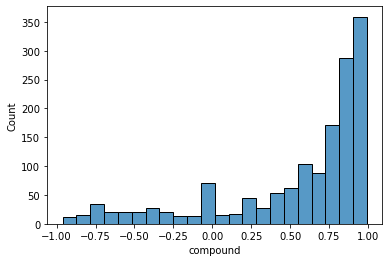

In [37]:
sns.histplot(seafoodcuisine1['compound'])

<AxesSubplot:xlabel='compound', ylabel='Count'>

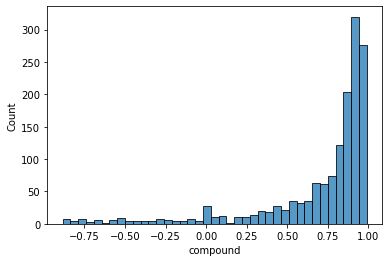

In [38]:
#Compound graph
sns.histplot(steakandgrill1['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

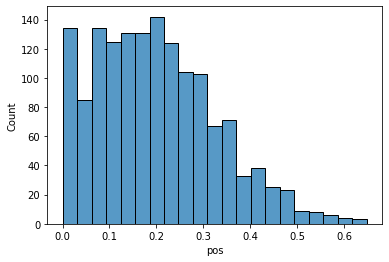

In [39]:
#Positive reviews graph
sns.histplot(seafoodcuisine1['pos'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

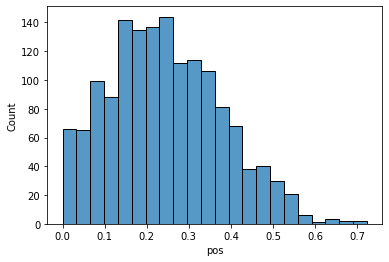

In [40]:
#Positive reviews graph
sns.histplot(steakandgrill1['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

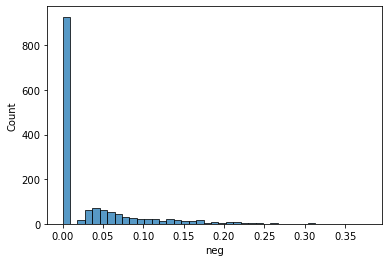

In [41]:
#Positive reviews graph
sns.histplot(seafoodcuisine1['neg'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

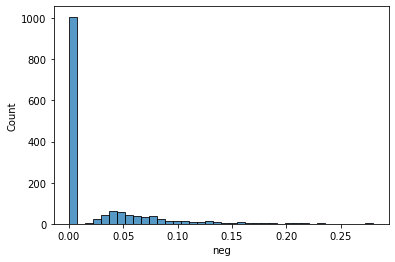

In [42]:
#Negative reviews graph
sns.histplot(steakandgrill1['neg'])

In [43]:
#Negative reviews per Restaurant for steakandgrill
(steakandgrill1['compound']<=0).groupby(steakandgrill1['Restaurant']).sum()

Restaurant
Andaman Grill                           11
Bondi Aussie Bar & Grill Phuket         20
Buffalo Steak House - Karon Beach       11
Churrasco Phuket Steakhouse              5
Cut Grill & Lounge                      11
EAT. bar & grill                         4
El Gaucho Steakhouse                    12
Harrys Steakhouse & Hotel               11
Karlsson Restaurant & Steak House       10
Karon Cafe Steakhouse & Thai Cuisine     6
Mando Restaurant & Steakhouse            3
Plum Prime Steakhouse                    7
Sam's Steaks and Grill                   1
The Blue Mango Bar and Grill             6
Three Crowns Restaurant & Grill          4
Name: compound, dtype: int64

In [44]:
#Negative reviews per Restaurant for seafood
(seafoodcuisine1['compound']<=0).groupby(seafoodcuisine1['Restaurant']).sum()

Restaurant
99 Seafood                           23
Horn Grill Steak and Seafood         11
Karon Seafood                        27
Kusuma Seafood                       20
Kwong Shop Seafood                    6
Laem Hin Seafood                     10
Linda Seafood                        11
Mai Khao Seafood Local Restaurant    10
Mr Good's Seafood                    30
Patong Seafood                       30
Red Duck Restaurant                   4
Salaloy Seafood                      16
Savoy Patong                         19
Tiger Inn Restaurant                 27
Up Seafood                           22
Name: compound, dtype: int64

In [45]:
#Negative reviews per Restaurant percentage score for steakandgrill
steak_percent_negative = pd.DataFrame((steakandgrill1['compound']<=0).groupby(steakandgrill1['Restaurant']).sum()
                                /steakandgrill1['Restaurant'].groupby(steakandgrill1['Restaurant']).count()*100,
                                columns = ['%steak_negative_reviews']).sort_values(by='%steak_negative_reviews')
                        
steak_percent_negative

,%steak_negative_reviews
Restaurant,
Sam's Steaks and Grill,1.0
Mando Restaurant & Steakhouse,3.0
EAT. bar & grill,4.0
Three Crowns Restaurant & Grill,4.0
Churrasco Phuket Steakhouse,5.0
Karon Cafe Steakhouse & Thai Cuisine,6.0
The Blue Mango Bar and Grill,6.0
Plum Prime Steakhouse,7.0
Karlsson Restaurant & Steak House,10.0


In [46]:
#Negative reviews per Restaurant percentage score for seafood
sea_percent_negative = pd.DataFrame((seafoodcuisine1['compound']<=0).groupby(seafoodcuisine1['Restaurant']).sum()
                                /seafoodcuisine1['Restaurant'].groupby(seafoodcuisine1['Restaurant']).count()*100,
                                columns = ['%seafood_negative_reviews']).sort_values(by='%seafood_negative_reviews')
                        
sea_percent_negative

,%seafood_negative_reviews
Restaurant,
Red Duck Restaurant,4.0
Kwong Shop Seafood,6.0
Laem Hin Seafood,10.0
Mai Khao Seafood Local Restaurant,10.0
Horn Grill Steak and Seafood,11.0
Linda Seafood,11.0
Salaloy Seafood,16.0
Savoy Patong,19.0
Kusuma Seafood,20.0


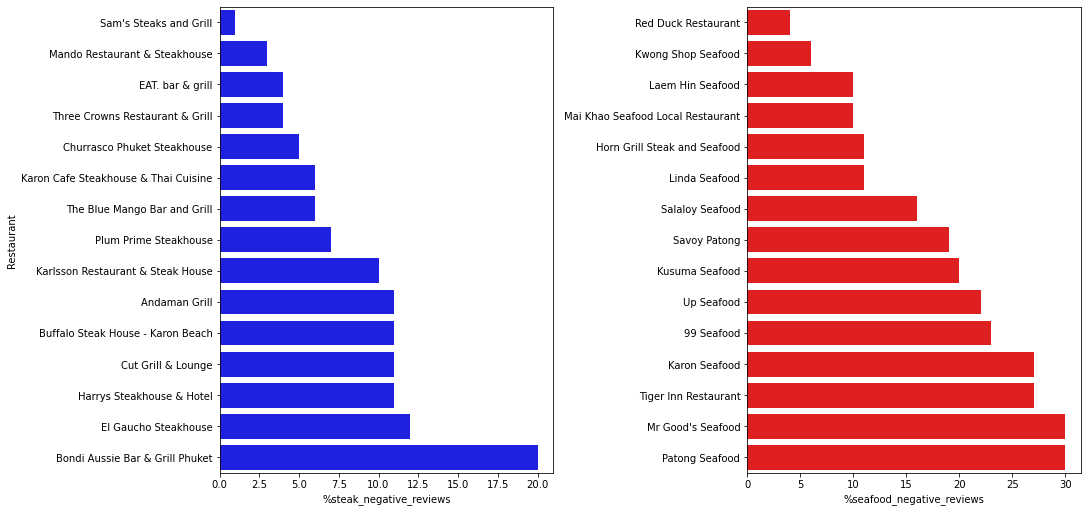

In [47]:
# Plotting Negative reviews per Restaurant percentage score for both steakandgrill and seafood
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7),layout='constrained')

sns.barplot(data=steak_percent_negative, x='%steak_negative_reviews', y=steak_percent_negative.index, color='b',ax=ax1)
sns.barplot(data=sea_percent_negative, x='%seafood_negative_reviews', y=sea_percent_negative.index, color='r',ax=ax2)

ax2.set_ylabel("")


plt.show()

In [48]:
#Positive reviews per Restaurant for seafood
(seafoodcuisine1['compound']>=0).groupby(seafoodcuisine1['Restaurant']).sum()

Restaurant
99 Seafood                           78
Horn Grill Steak and Seafood         92
Karon Seafood                        79
Kusuma Seafood                       87
Kwong Shop Seafood                   95
Laem Hin Seafood                     91
Linda Seafood                        91
Mai Khao Seafood Local Restaurant    94
Mr Good's Seafood                    74
Patong Seafood                       73
Red Duck Restaurant                  98
Salaloy Seafood                      90
Savoy Patong                         83
Tiger Inn Restaurant                 84
Up Seafood                           84
Name: compound, dtype: int64

In [49]:
#Positive reviews per Restaurant for steakandgrill
(steakandgrill1['compound']>=0).groupby(steakandgrill1['Restaurant']).sum()

Restaurant
Andaman Grill                           90
Bondi Aussie Bar & Grill Phuket         82
Buffalo Steak House - Karon Beach       91
Churrasco Phuket Steakhouse             95
Cut Grill & Lounge                      90
EAT. bar & grill                        97
El Gaucho Steakhouse                    89
Harrys Steakhouse & Hotel               91
Karlsson Restaurant & Steak House       94
Karon Cafe Steakhouse & Thai Cuisine    95
Mando Restaurant & Steakhouse           98
Plum Prime Steakhouse                   93
Sam's Steaks and Grill                  99
The Blue Mango Bar and Grill            99
Three Crowns Restaurant & Grill         97
Name: compound, dtype: int64

In [50]:
#Positive reviews per Restaurant percentage score for seafoood
seafood_percent_positive = pd.DataFrame((seafoodcuisine1['compound']>=0).groupby(seafoodcuisine1['Restaurant']).sum()
                                /seafoodcuisine1['Restaurant'].groupby(seafoodcuisine1['Restaurant']).count()*100,
                                columns = ['%seafood_positive_reviews']).sort_values(by='%seafood_positive_reviews')
                        
seafood_percent_positive

,%seafood_positive_reviews
Restaurant,
Patong Seafood,73.0
Mr Good's Seafood,74.0
99 Seafood,78.0
Karon Seafood,79.0
Savoy Patong,83.0
Tiger Inn Restaurant,84.0
Up Seafood,84.0
Kusuma Seafood,87.0
Salaloy Seafood,90.0


In [51]:
#Positive reviews per Restaurant percentage score for steakandgrill
steak_percent_positive = pd.DataFrame((steakandgrill1['compound']>=0).groupby(steakandgrill1['Restaurant']).sum()
                                /steakandgrill1['Restaurant'].groupby(steakandgrill1['Restaurant']).count()*100,
                                columns = ['%steak_positive_reviews']).sort_values(by='%steak_positive_reviews')
                        
steak_percent_positive

,%steak_positive_reviews
Restaurant,
Bondi Aussie Bar & Grill Phuket,82.0
El Gaucho Steakhouse,89.0
Andaman Grill,90.0
Cut Grill & Lounge,90.0
Buffalo Steak House - Karon Beach,91.0
Harrys Steakhouse & Hotel,91.0
Plum Prime Steakhouse,93.0
Karlsson Restaurant & Steak House,94.0
Churrasco Phuket Steakhouse,95.0


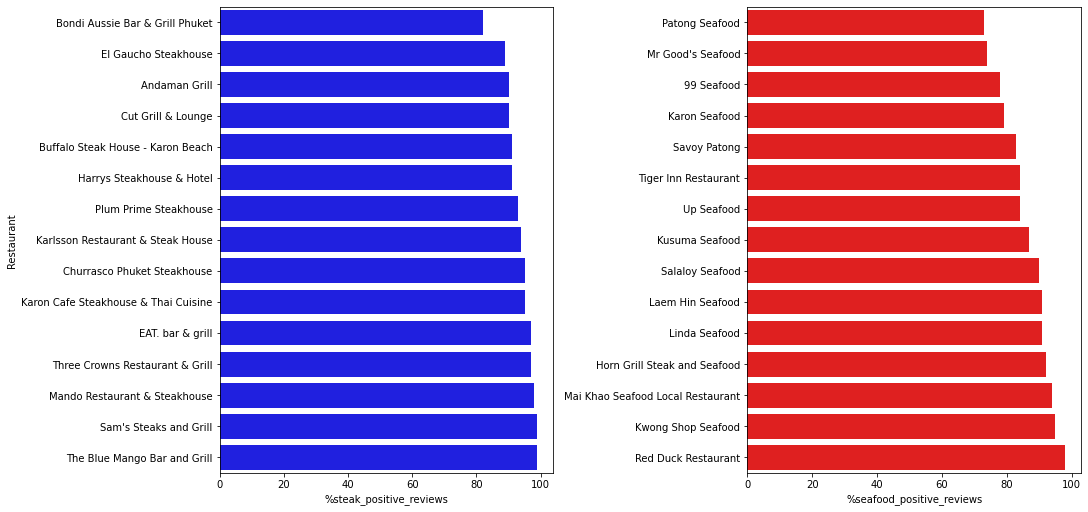

In [52]:
# Plotting Positive reviews per Restaurant percentage score for both steakandgrill and seafood
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7),layout='constrained')

sns.barplot(data=steak_percent_positive, x='%steak_positive_reviews', y=steak_percent_positive.index, color='b',ax=ax1)
sns.barplot(data=seafood_percent_positive, x='%seafood_positive_reviews', y=seafood_percent_positive.index, color='r',ax=ax2)

ax2.set_ylabel("")


plt.show()

In [53]:
#creating function to compute the negative (-1), neutral (0), and positive (+1) seafoodcuisine1 sentiments
def getRatingAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

seafoodcuisine1['sentiment'] = seafoodcuisine1['compound'].apply(getRatingAnalysis)

seafoodcuisine1.head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\1102343409.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seafoodcuisine1['sentiment'] = seafoodcuisine1['compound'].apply(getRatingAnalysis)


,ID,Review Date,Location,Restaurant,Review,compound,neg,neu,pos,sentiment
4056,rn580840569,Reviewed 3 days ago,Kata Beach,Red Duck Restaurant,We returned to Red duck after being away for a...,0.8807,0.000,0.793,0.207,Positive
4057,rn580360953,Reviewed 5 days ago,Kata Beach,Red Duck Restaurant,"Awesome curry, pad Thai, and pineapple fried r...",0.9346,0.000,0.515,0.485,Positive
4058,rn573007569,"Reviewed April 12, 2018",Kata Beach,Red Duck Restaurant,The only regret we had was that we visited thi...,0.5983,0.057,0.808,0.135,Positive
4059,rn572025939,"Reviewed April 8, 2018",Kata Beach,Red Duck Restaurant,Red Duck was amazing and the food was great. T...,0.9565,0.000,0.688,0.312,Positive
4060,rn571965310,"Reviewed April 8, 2018",Kata Beach,Red Duck Restaurant,Went for dinner on our last day based on the g...,0.7906,0.000,0.860,0.140,Positive


In [54]:
#creating function to compute the negative (-1), neutral (0), and positive (+1) steakandgrill sentiments
def getRatingAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

steakandgrill1['sentiment'] = steakandgrill1['compound'].apply(getRatingAnalysis)

steakandgrill1.head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\1722599154.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steakandgrill1['sentiment'] = steakandgrill1['compound'].apply(getRatingAnalysis)


,ID,Review Date,Location,Restaurant,Review,compound,neg,neu,pos,sentiment
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,I was excited to finally come here and try the...,0.4939,0.080,0.759,0.161,Positive
494,rn580837511,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,This place prides it’s self on only serving th...,0.8402,0.027,0.811,0.162,Positive
495,rn580780572,Reviewed 3 days ago,Karon Beach,EAT. bar & grill,99 Thai Bhat for a simply delicious mojito! I ...,0.6467,0.000,0.791,0.209,Positive
496,rn580641423,Reviewed 4 days ago,Karon Beach,EAT. bar & grill,Very trendy place to have your a meal Staff we...,0.5413,0.000,0.837,0.163,Positive
497,rn576233218,Reviewed 3 weeks ago,Karon Beach,EAT. bar & grill,"Best food, starter start with bruschetta and f...",0.8779,0.000,0.581,0.419,Positive


In [55]:
#seafood sentiment count per category
seafoodcuisine1['sentiment'].value_counts()

Positive    1234
Negative     207
Neutral       59
Name: sentiment, dtype: int64

In [56]:
#steakandgrill sentiment count per category
steakandgrill1['sentiment'].value_counts()

Positive    1378
Negative     100
Neutral       22
Name: sentiment, dtype: int64

         sentiment  Positive  Negative  Neutral
0   steakandgrill1      1378       100       22
1  seafoodcuisine1      1234       207       59


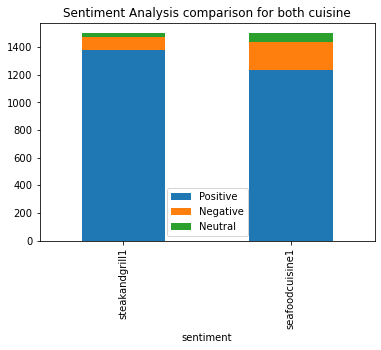

In [57]:
# created data from sentiment count output
df = pd.DataFrame([['steakandgrill1', 1378, 100, 22], ['seafoodcuisine1', 1234, 207, 59]],
                  columns=['sentiment', 'Positive', 'Negative', 'Neutral'])
# view data
print(df)
 
# plot data in stack manner of bar type
df.plot(x='sentiment', kind='bar', stacked=True, title='Sentiment Analysis comparison for both cuisine')
plt.show()

In [58]:
#token of negative words for seafood
sea_neg_tokens = ([Review for Review in seafoodcuisine1[seafoodcuisine1['sentiment']=='Negative']['Review']])

sea_neg_tokens

['Visited after reading the glowing reviews,but found the food to be really bland and lacking in flavour.\r\nThe price was higher than most other restaurants which made it even more disappointing , and granted the service was good but you pay for it in a...More',
 'Place gets busy so may have to wait, they don’t seem to have online booking so if you want to go phone ahead. Not many tables in doors but quite a few outdoors. Food was fine no problems but I’ve had better in some other...More',
 "THIS IS NOT A CHILDREN FRIENDLY RESTAURANT, ANYONE WITH BABIES PLS STOP YOUR FOOT! 1,sink is very high how a child can wash hand? 2,nothing plastic for babies which means while you eating you have to pay attention on your children and if it's broken...More",
 'We had delicious starters to share but it stopped there. Main course not as impressive, lots of flavour but tough meat. Would return for light bites but not a full course.',
 'We hoped to enjoy different seafood dishes, but left very disappo

In [59]:
#token of negative words for steakandgrill
steak_neg_tokens = ([Review for Review in steakandgrill1[steakandgrill1['sentiment']=='Negative']['Review']])

steak_neg_tokens

["We visited here on our first night in Phuket. We had dined on Thai food since arriving in Bangkok three days earlier and were craving something different.\r\nWe struggled to find a restaurant as everywhere seemed to specialise in ALL cuisines...which doesn't always bode well....More",
 'We were really fancying a good steak and took to trip advisor to help us out!! And it was the right decision.<f0><U+009F><U+0098><U+0080>\r\nWe hadn’t booked do did have a bit of a wait but this wasn’t a problem, as we sat and had a drink...More',
 'Good place. Its a steak house restaurant. Ufortunately our feeling is mixed. One steak was good but another was very bad (not tasty and hard to eat). We will not return.More',
 'My family and I had our Christmas Eve dinner in Sams Steaks and Grill last night and I could not praise this restaurant enough. The ambiance, the staff, the service and most of all the food were exceptional. We cannot wait to return.',
 'I stay at Meridian resort at Kata and after 

In [60]:
#token of positive words for seafood
seeapos_tokens = ([Review for Review in seafoodcuisine1[seafoodcuisine1['sentiment']=='Positive']['Review']])

seeapos_tokens

['We returned to Red duck after being away for a couple of years to find the same great staff serving up amazing food still with fresh Thai ingredients and produce. It’s a must if you are in the area. They even have a new sliding...More',
 'Awesome curry, pad Thai, and pineapple fried rice. Great service and great authentic Thai cuisine!!! Highly recommende',
 'The only regret we had was that we visited this little gem on the last night before they closed for a month, meaning we weren’t able to revisit!\r\nThe food was superb and the service first class. Huge portions too, so ordering a few starters...More',
 'Red Duck was amazing and the food was great. This was our most expensive meal but the quality was great. The waiters spoke good English and could understand what we were saying. The food was full of flavour and I like how the explained in...More',
 "Went for dinner on our last day based on the great reviews. Drinks were good, they don't have thai iced tea which we asked about. Ap

In [61]:
#wordcloud of positive words for steak and grill
sstteeakpos_tokens = ([Review for Review in steakandgrill1[steakandgrill1['sentiment']=='Positive']['Review']])

sstteeakpos_tokens

["I was excited to finally come here and try their food, the pictures looked great. The ambiance is decent and the service is fine, however, they gave me the worst burger I've had in over a decade. The patty, the quality of meat they used...More",
 'This place prides it’s self on only serving the best quality produce. The best steaks from Australia, Lamb from NZ and lobsters from the cold waters of Canada. You get what you pay for. This place is must for us when we return to Phuket.',
 '99 Thai Bhat for a simply delicious mojito! I don’t know if it was regular price or a happy hour promotion, but it was amazing!More',
 'Very trendy place to have your a meal Staff were very friendly. Food was freash and the atmosphere was goodMore',
 'Best food, starter start with bruschetta and foil gras, then chateubriant, chicken ham,lobster. Great staff, recommended here',
 "We were here with our family for family dinner. We had made reservation prior as we we're a big group of 16. Staff were extrem

In [62]:
 #focus specifically on restaurant with most positive and negative feedback in both category
seafoodcuisine1['processed_review']= seafoodcuisine1['Review'].apply(preprocess_text)

seafoodcuisine1_positive_subset = seafoodcuisine1.loc[(seafoodcuisine1['Restaurant']=='Red Duck Restaurant')
                                      & (seafoodcuisine1['compound']>0),:]

seafoodcuisine1_negative_subset = seafoodcuisine1.loc[(seafoodcuisine1['Restaurant']=='Patong Seafood')
                                      & (seafoodcuisine1['compound']<=0),:]

seafoodcuisine1_positive_subset.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\3198937904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seafoodcuisine1['processed_review']= seafoodcuisine1['Review'].apply(preprocess_text)


,ID,Review Date,Location,Restaurant,Review,compound,neg,neu,pos,sentiment,processed_review
4056,rn580840569,Reviewed 3 days ago,Kata Beach,Red Duck Restaurant,We returned to Red duck after being away for a...,0.8807,0.000,0.793,0.207,Positive,"[return, red, duck, away, coupl, year, find, g..."
4057,rn580360953,Reviewed 5 days ago,Kata Beach,Red Duck Restaurant,"Awesome curry, pad Thai, and pineapple fried r...",0.9346,0.000,0.515,0.485,Positive,"[awesom, curri, pad, thai, pineappl, fri, rice..."
4058,rn573007569,"Reviewed April 12, 2018",Kata Beach,Red Duck Restaurant,The only regret we had was that we visited thi...,0.5983,0.057,0.808,0.135,Positive,"[regret, visit, littl, gem, last, night, close..."
4059,rn572025939,"Reviewed April 8, 2018",Kata Beach,Red Duck Restaurant,Red Duck was amazing and the food was great. T...,0.9565,0.000,0.688,0.312,Positive,"[red, duck, amaz, food, great, expens, meal, q..."
4060,rn571965310,"Reviewed April 8, 2018",Kata Beach,Red Duck Restaurant,Went for dinner on our last day based on the g...,0.7906,0.000,0.860,0.140,Positive,"[went, dinner, last, day, base, great, review,..."


In [63]:
 #focus specifically on restaurant with most positive feedback in both category

steakandgrill1['processed_review']= steakandgrill1['Review'].apply(preprocess_text)

steakandgrill1_positive_subset = steakandgrill1.loc[(steakandgrill1['Restaurant']=='The Blue Mango Bar and Grill')
                                      & (steakandgrill1['compound']>0),:]

steakandgrill1_negative_subset = steakandgrill1.loc[(steakandgrill1['Restaurant']=='Bondi Aussie Bar & Grill Phuket')
                                      & (steakandgrill1['compound']<=0),:]

steakandgrill1_positive_subset.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19228\4227631888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steakandgrill1['processed_review']= steakandgrill1['Review'].apply(preprocess_text)


,ID,Review Date,Location,Restaurant,Review,compound,neg,neu,pos,sentiment,processed_review
4941,rn580610147,Reviewed 4 days ago,Patong,The Blue Mango Bar and Grill,Second time visiting and both the food and ser...,0.9191,0.000,0.628,0.372,Positive,"[second, time, visit, food, servic, disappoint..."
4942,rn566460877,"Reviewed March 14, 2018",Patong,The Blue Mango Bar and Grill,"Tonight was a special night for ten of us, 2 c...",0.8993,0.000,0.781,0.219,Positive,"[tonight, special, night, ten, us, 2, celebr, ..."
4943,rn580551380,Reviewed 4 days ago,Patong,The Blue Mango Bar and Grill,It's a nice and beautiful<U+200B> place. Excel...,0.9150,0.000,0.540,0.460,Positive,"[nice, beauti, u, 200b, place, excel, food, se..."
4944,rn579849145,Reviewed 1 week ago,Patong,The Blue Mango Bar and Grill,Been to this restaurant a lot when I over in p...,0.9052,0.000,0.662,0.338,Positive,"[restaur, lot, patong, never, bad, meal, manag..."
4945,rn579797652,Reviewed 1 week ago,Patong,The Blue Mango Bar and Grill,"Normally I don't write reviews, but this place...",0.0565,0.076,0.843,0.081,Positive,"[normal, write, review, place, deserv, eat, de..."


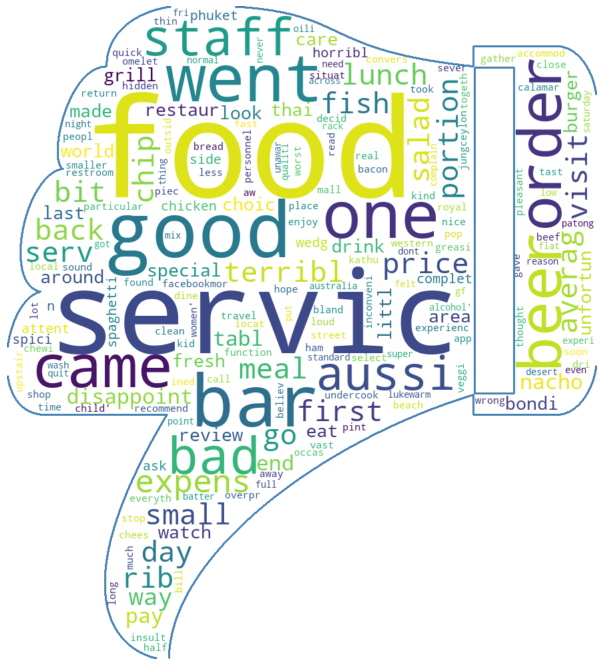

In [64]:
#Get token from the restaurant with the most positive and negative words in the steakandgrill1 category 
#and visualize with word cloud
steakandgrill1_neg_tokens = [word for review in steakandgrill1_negative_subset['processed_review'] for word in review]

maskneg = np.array(Image.open("thhhumbdown.png"))

wordcloud = WordCloud(background_color = 'white',mask=maskneg,contour_width=3, contour_color='steelblue').generate_from_text(
' '.join(steakandgrill1_neg_tokens))

#display the generated image
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

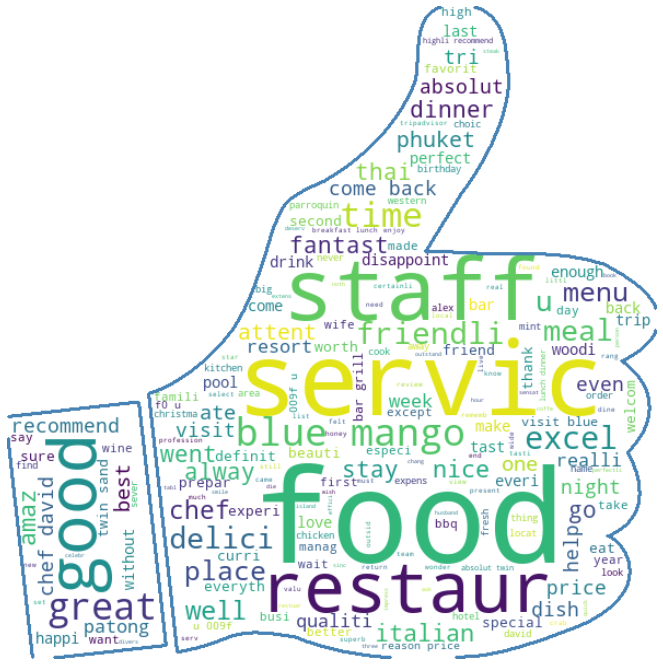

In [65]:
#Get token from the restaurant with the most positive and negative words in the steakandgrill1 category 
#and visualize with word cloud
steakandgrill1_pos_tokens = [word for review in steakandgrill1_positive_subset['processed_review'] for word in review]


mask1 = np.array(Image.open("Thumbsup.png"))
wordcloud = WordCloud(background_color = 'white',mask=mask1,contour_width=3, contour_color='steelblue').generate_from_text(
' '.join(steakandgrill1_pos_tokens))

#display the generated image
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

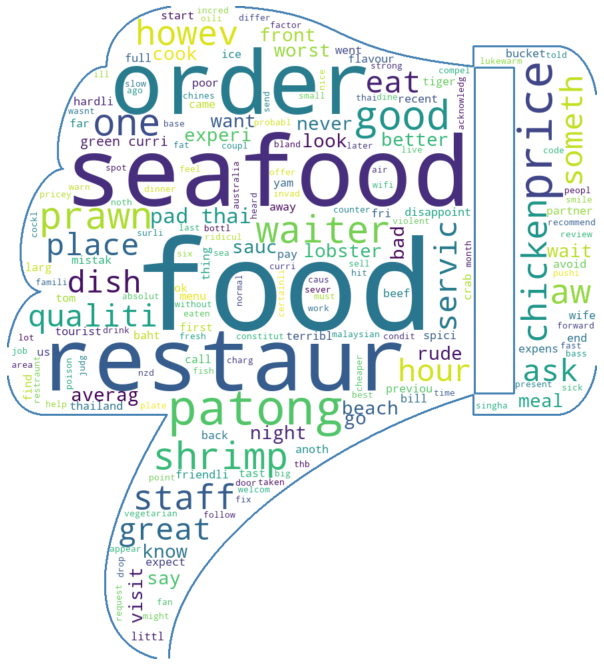

In [66]:
#Get token from the restaurant with the most positive and negative words in the seafood category
#and visualize with word cloud
seafoodcuisine1_neg_tokens = [word for review in seafoodcuisine1_negative_subset['processed_review'] for word in review]
maskneg = np.array(Image.open("thhhumbdown.png"))

wordcloud = WordCloud(background_color = 'white',mask=maskneg,contour_width=3, contour_color='steelblue').generate_from_text(
' '.join(seafoodcuisine1_neg_tokens))

#display the generated image
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

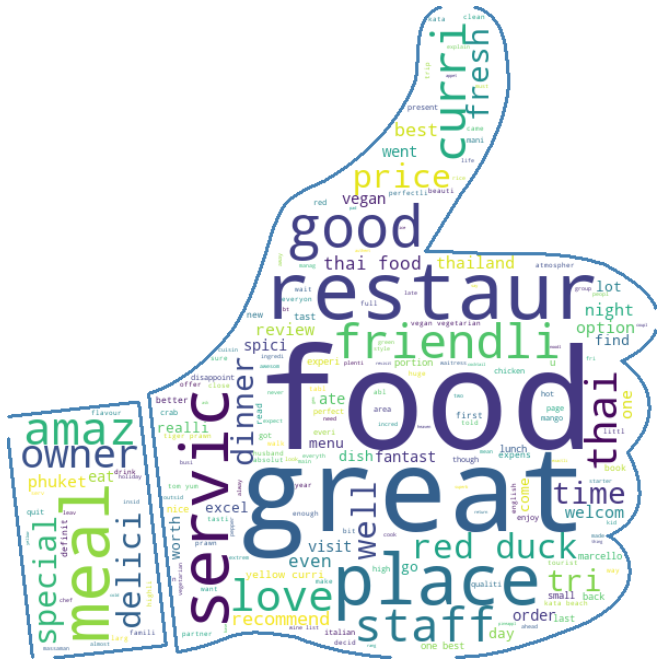

In [67]:
#Get token from the restaurant with the most positive and negative words in the seafood category
#and visualize with word cloud
seafoodcuisine1_pos_tokens = [word for review in seafoodcuisine1_positive_subset['processed_review'] for word in review]
                              


mask1 = np.array(Image.open("Thumbsup.png"))
wordcloud = WordCloud(background_color = 'white',mask=mask1,contour_width=3, contour_color='steelblue').generate_from_text(
' '.join(seafoodcuisine1_pos_tokens))

#display the generated image
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()                         

In [68]:
#use nltk FreqDist and then tabulate for steakandgrill
from nltk.probability import FreqDist

steakandgrill1_pos_FreqDist = FreqDist(steakandgrill1_pos_tokens)

steakandgrill1_pos_FreqDist.tabulate(10)

   food  servic   staff restaur    blue    good   mango   great    time    chef 
     70      39      36      35      32      32      30      28      24      23 


In [69]:
#use nltk FreqDist and then tabulate for seafood
from nltk.probability import FreqDist

seafoodcuisine1_pos_FreqDist = FreqDist(seafoodcuisine1_pos_tokens)

seafoodcuisine1_pos_FreqDist.tabulate(10)

   food   great restaur   curri    thai   place     red  servic    meal    good 
     67      37      31      28      27      23      21      21      21      21 


In [70]:
#use nltk FreqDist and then tabulate for steakand grill
from nltk.probability import FreqDist

steakandgrill1_neg_FreqDist = FreqDist(steakandgrill1_neg_tokens)

steakandgrill1_neg_FreqDist.tabulate(10)

  food servic   good    bar    one   went   came   beer  order  staff 
    12      8      7      6      5      5      4      4      4      4 


In [71]:
#use nltk FreqDist and then tabulate for seafood
from nltk.probability import FreqDist

seafoodcuisine1_neg_FreqDist = FreqDist(seafoodcuisine1_neg_tokens)

seafoodcuisine1_neg_FreqDist.tabulate(10)

   food seafood   order restaur  patong   price    good     one  waiter  shrimp 
     19      13      12      12      11      10       7       6       6       6 


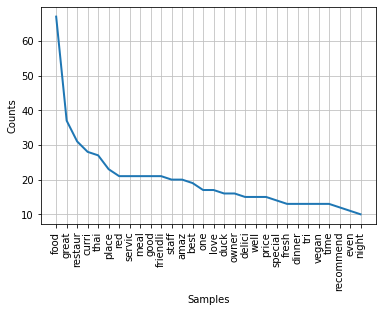

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [72]:
#visualise the positive frequent distribution for the seafood restaurant with most positive feedback
seafoodcuisine1_pos_FreqDist.plot(30)

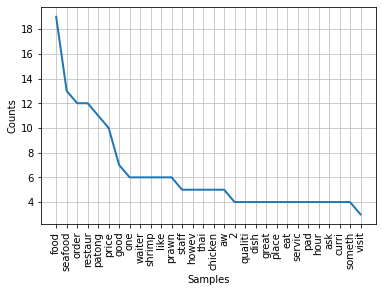

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [73]:
#visualise the negative frequent distribution for the seafood restaurant with most negative feedback
seafoodcuisine1_neg_FreqDist.plot(30)

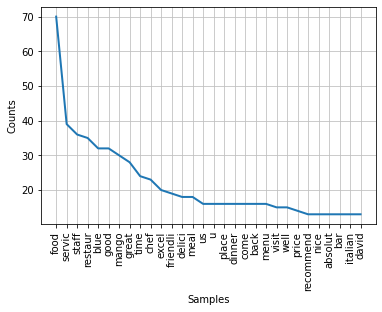

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [74]:
#visualise the positive frequent distribution for the steak and grill restaurant with most positive feedback
steakandgrill1_pos_FreqDist.plot(30)

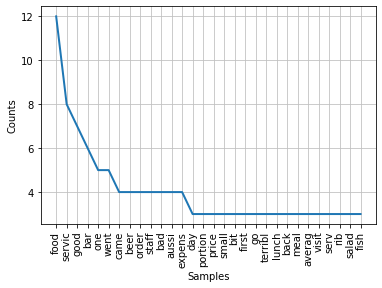

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [75]:
#visualise the negative frequent distribution for the seafood restaurant with most negative feedback
steakandgrill1_neg_FreqDist.plot(30)